In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
%matplotlib inline

'No entiendo el X[:, 0], X[:, 1]'

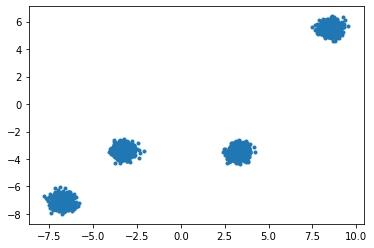

In [11]:
X, y = make_blobs(n_samples=3000, centers=4, cluster_std=0.3)
plt.scatter(X[:, 0], X[:, 1], marker='.')
"""No entiendo el X[:, 0], X[:, 1]"""

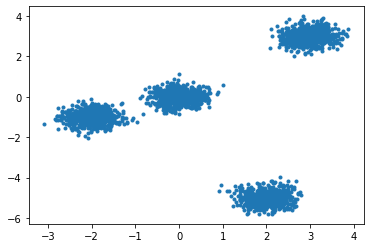

In [43]:
X, y = make_blobs(n_samples=3000, centers=[[3,3], [-2, -1], [2, -5], [0, 0]], cluster_std=0.3)
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [45]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_labels)
print()
print(k_means_cluster_centers)

[0 0 3 ... 1 1 2]

[[-6.15349562e-03  2.42264021e-03]
 [ 2.00596612e+00 -4.99870360e+00]
 [ 2.98190898e+00  3.00654109e+00]
 [-2.01081812e+00 -1.00592980e+00]]


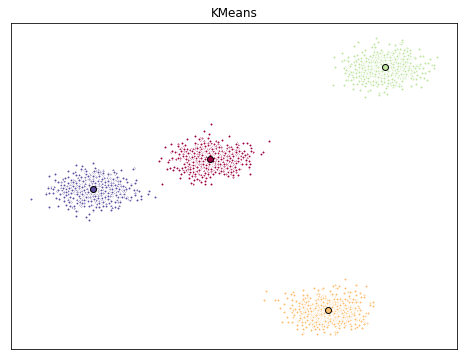

In [48]:
fig = plt.figure(figsize = (8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len([[3,3], [-2, -1], [2, -5], [0, 0]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor = col, marker = '.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

### Customer dataset

In [84]:
df = pd.read_csv("../Datasets/Cust_Segmentation.csv")
df = df.drop('Address', axis = 1) # We don't need qualitative data, so we drop the column (axis 1)
df.head(2)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8


In [122]:
# Normalizing: We use StandardScaler() to normalize our dataset
X = df.values[:,1:]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
X.shape

(850, 9)

In [147]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
labels = k_means.labels_ # print(labels) = 0,1,2
k_means.cluster_centers_

array([[-0.43301717,  0.11906266, -0.6904437 , -0.42856871,  0.00500651,
        -0.06724235,  1.86408387,  0.6311127 , -0.46733707],
       [ 0.96049269,  0.28199752,  1.19230889,  1.38998084,  0.9589673 ,
         1.04384449, -0.197593  ,  0.12551257,  1.72535893],
       [-0.19995955, -0.13706426, -0.19955091, -0.35241344, -0.3388334 ,
        -0.34568743, -0.52379654, -0.24500394, -0.45801698]])

In [148]:
df["Clus_km"] = labels
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,423.641975,31.549383,1.820988,3.888889,30.166667,1.587457,2.850364,0.987578,14.409877
1,417.558659,42.748603,1.972067,16.642458,100.217877,3.614235,6.624503,0.170213,11.014525
2,428.884086,33.422397,1.583497,7.214145,33.100196,0.856937,1.904542,0.000000,8.526326


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


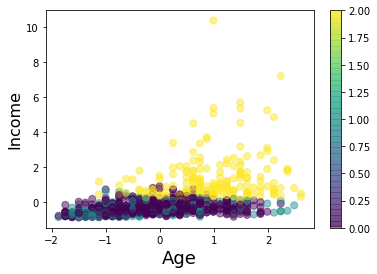

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter=ax.scatter(X[:, 0],X[:, 3],c=labels.astype(np.float),s=50,alpha=0.5)
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('Income', fontsize=16)
plt.colorbar(scatter)
fig.show()

In [139]:
# km.get_params()
#print(km.inertia_)
#print(silhouette_score(X, y))
#y_kmeans = KMeans.predict(X)
#acc = metrics.adjusted_rand_score(y, y_kmeans)

### Other dataset

In [102]:
X1 = pd.read_csv("../Datasets/cluster1.csv").values+15
km = KMeans(n_clusters = 2)
km.fit(X1)
y1 = km.predict(X1)

In [103]:
pd.Series(y1).value_counts()

0    392
1    108
dtype: int64

In [104]:
km.cluster_centers_

array([[19.5061742 , 14.31526768],
       [23.01615594, 24.85357474]])

Text(0, 0.5, 'largo del trilobite')

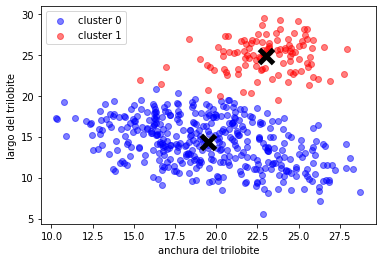

In [105]:
cmap = plt.cm.plasma
cmap((y1*255./(n_clusters-1)).astype(int))
for i in np.unique(y):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = X1[y1 == i]
    plt.scatter(Xr[:,0], Xr[:,1], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()    
plt.xlabel("anchura del trilobite")
plt.ylabel("largo del trilobite")